In [28]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score


In [29]:
data = datasets.load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [30]:
# Train test split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [31]:

# Model definition
model = DecisionTreeClassifier(random_state=42)

# Model training
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [32]:
# Previsione sui dati di test
y_pred = model.predict(X_test)

# Calcolo della precisione
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.94


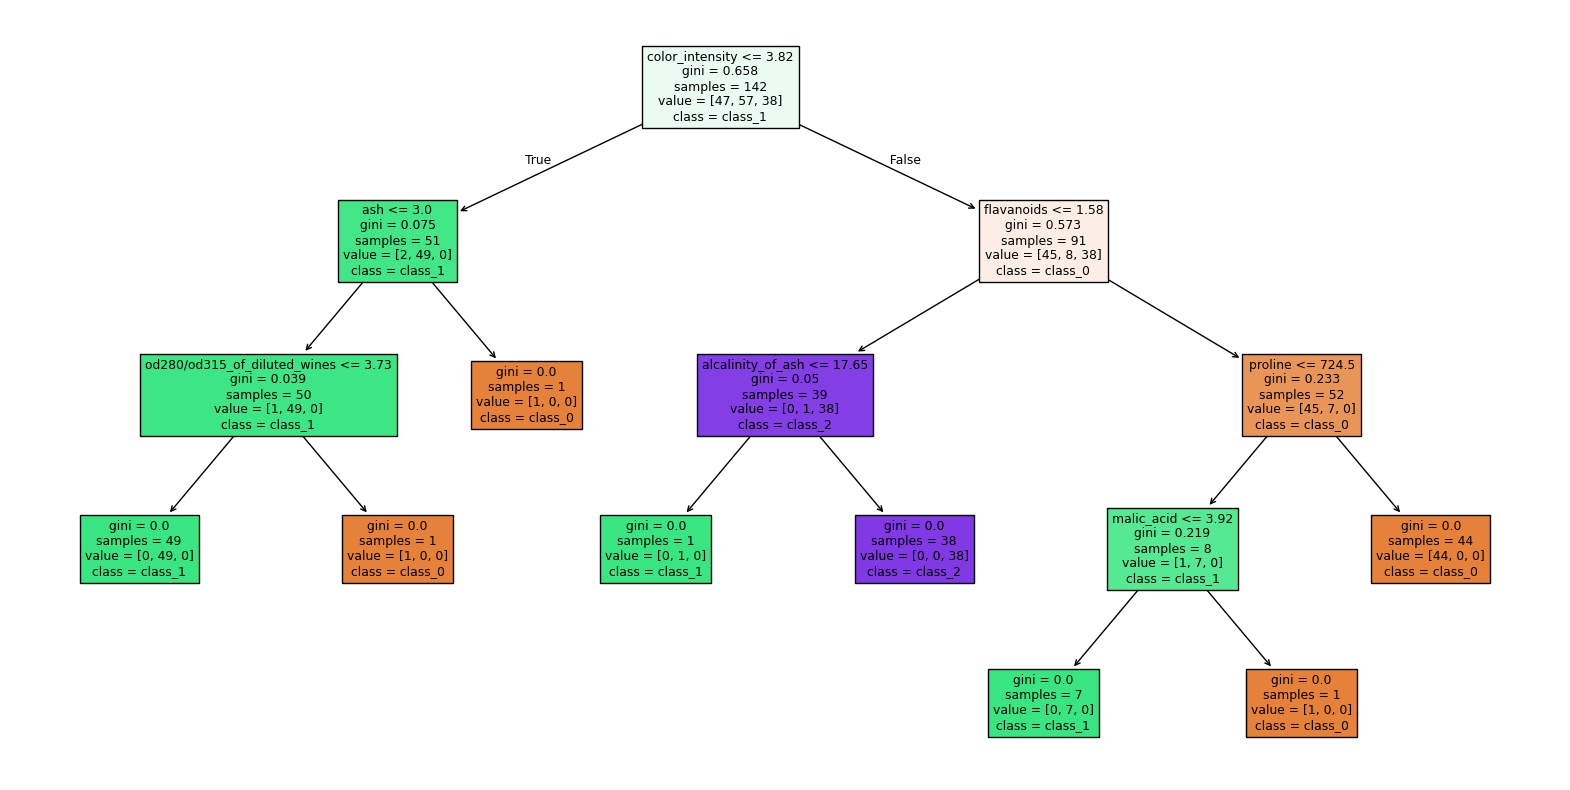

In [33]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


In [34]:
# Model creation with pre-pruning
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Model training
model_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pruned = model_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy after pruning: {accuracy_pruned:.2f}')


Accuracy after pruning: 0.94


C:\Users\vinor\AppData\Local\Temp\ipykernel_19340\1649768808.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


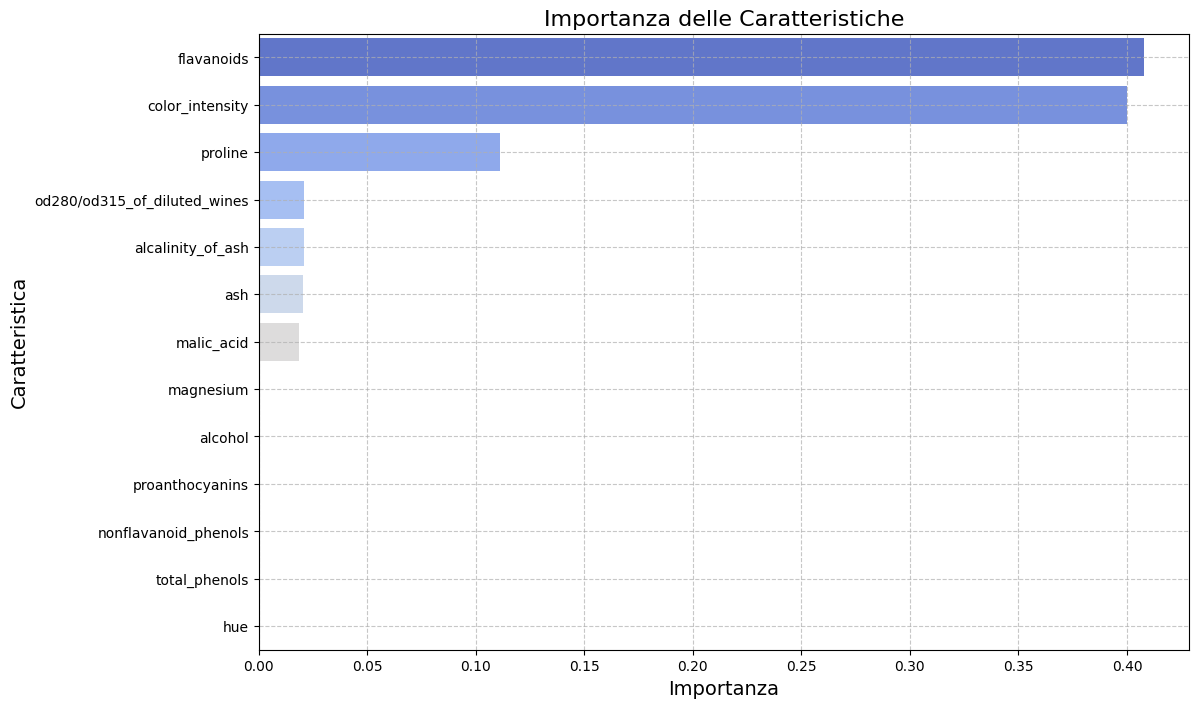

In [35]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Pre-pruning


In [36]:
# Model with pre-pruning
# min_samples_split: The minimum number of samples required to split an internal node
model_pre_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
model_pre_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pre_pruned = model_pre_pruned.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Accuracy with pre-pruning: {accuracy_pre_pruned:.2f}')

Accuracy with pre-pruning: 0.94


### Post-pruning

In [37]:
# Model with post-pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Find the best alpha
model_pruned = None
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model_temp.fit(X_train, y_train)
    y_pred_temp = model_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        model_pruned = model_temp

print(f'Best accuracy after post-pruning: {best_accuracy:.2f}')


Best accuracy after post-pruning: 0.94


### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

# Cross validation with cross validation setted to 5
scores = cross_val_score(model_pruned, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.91666667 0.80555556 0.83333333 0.91428571 0.85714286]
Mean accuracy: 0.87


### Cross validation and post-pruning

In [39]:
best_model = None
best_score = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = model_temp

print(f'Best cross-validated accuracy: {best_score:.2f}')

Best cross-validated accuracy: 0.92


In [ ]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(random_state=42)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

best_model = None
best_score = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = model_temp

print(f'Best cross-validated accuracy: {best_score:.2f}')

# Feature importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [40]:
# Best model training
best_model.fit(X_train, y_train)

# test evaluation
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy on test set: {accuracy_best:.2f}')

Accuracy on test set: 0.94


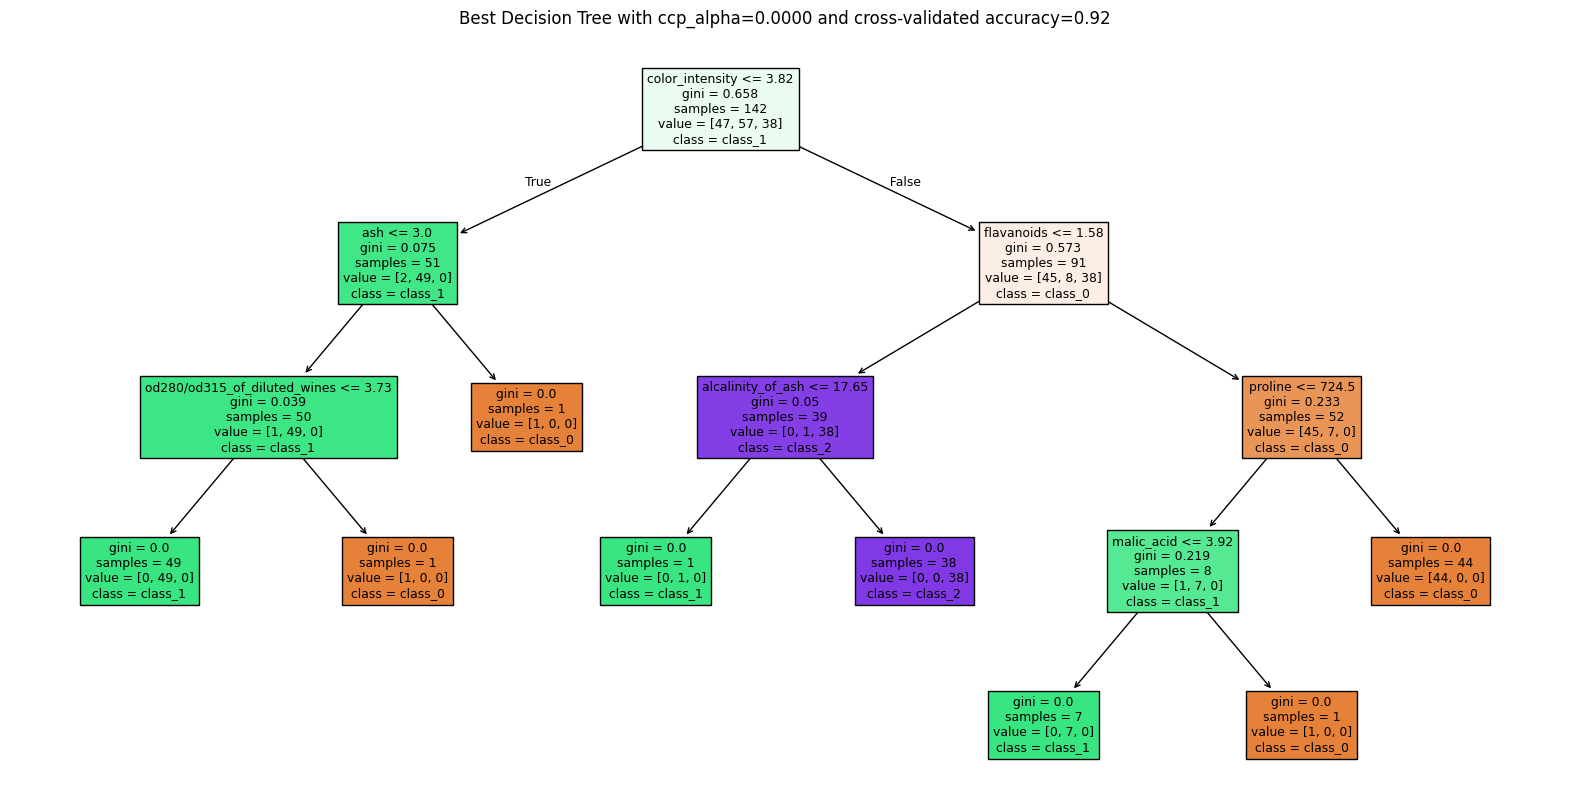

In [42]:
# Best model visualization
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title(f'Best Decision Tree with ccp_alpha={best_model.ccp_alpha:.4f} and cross-validated accuracy={best_score:.2f}')
plt.show()